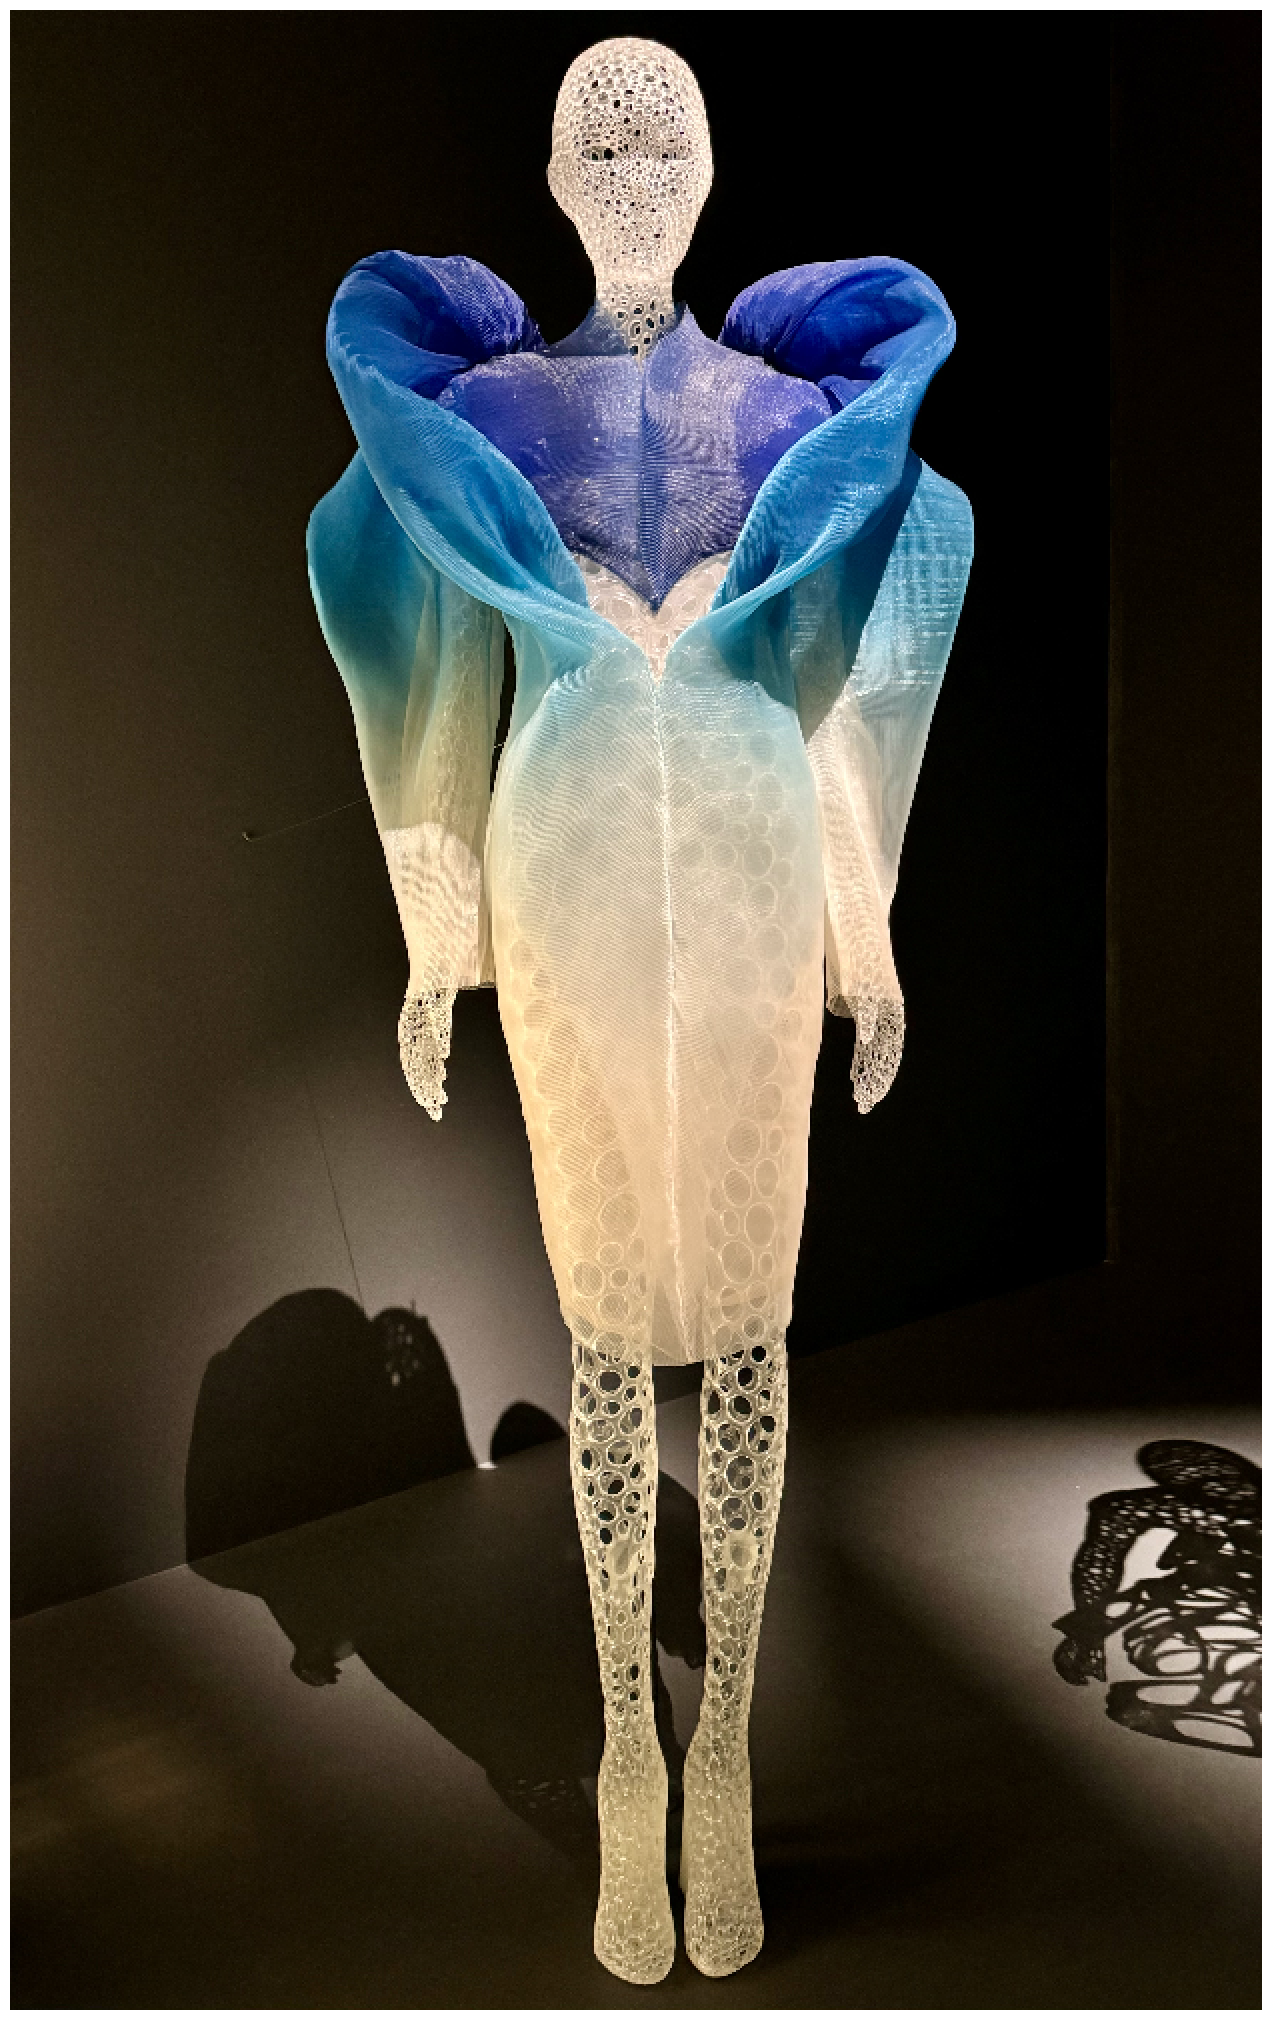

In [24]:
# Before beginning, when creating a new virtual environment:
# Activate cv_project virtual environment
# Install opencv, numpy, jupyter, and matplotlib packages
# Install ipykernel, and run:
# python -m ipykernel install --user --name="CV" --display-name="Computer Vision Project"
# Open Jupyter

import numpy as np
import sys
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

#max_dimension = 512 
def change_size(path, max_dim=1000):
    img = cv2.imread(path)
    if img is None:
        raise ValueError("Image not found or could not be loaded")

    height, width = img.shape[:2]
    scale = min(max_dim/width, max_dim/height)
    if scale < 1:
        new_width = int(width*scale)
        new_height = int(height*scale)
        img = cv2.resize(img, (new_width, new_height))

    return(img)

img = change_size('Iris_Van_Herpen_Sculpting_the_Senses_exhibition_at_QGOMA,_2024,_09.jpg')

#print("Before display:", img.shape)  # Check final image shape
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax.set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0,0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.show()

In [ ]:
B, G, R = cv2.split(img)

cv2.imshow("original", img)
cv2.waitKey(0)

cv2.imshow("blue", B)
cv2.waitKey(0)

cv2.imshow("green", G)
cv2.waitKey(0)

cv2.imshow("red", R)
cv2.waitKey(0)

cv2.destroyAllWindows()